In [28]:
%matplotlib inline
import numpy as np
import cv2, matplotlib
import matplotlib.pyplot as plt
from IPython.core.display import display

def read_img(name_i):
    img = cv2.imread(name_i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def detect_face(img_name, cascade_path):
    #画像入力
    img = read_img(img_name)
    width = img.shape[1]
    height = img.shape[0]
    img = cv2.resize(img , (width , height))

    #入力画像をグレー画像に変換
    gry = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    #顔認識実行。特徴量のpathを引数から入力。
    cascade = cv2.CascadeClassifier(cascade_path)

    #minNeighbors=20, minSize=(30, 30)→検出枠が近すぎるのと、小さすぎるのは間引く。
    facerect = cascade.detectMultiScale(gry, scaleFactor=1.05, minNeighbors=20, minSize=(30, 30))

    dst_img = []
    if len(facerect) > 0:
        color = (255, 0, 0)
        for rect in facerect:
            x = rect[0]
            y = rect[1]
            w = rect[2]
            h = rect[3]
            #検出した顔を囲む矩形を作成し、１枚の画像ずつ追加。
            add_image = cv2.resize(img[y : y+h , x : x + w] , (64 , 64))
            dst_img.append(add_image)

            #画像に枠を枠を書く
            cv2.rectangle(img, tuple(rect[0:2]),tuple(rect[0:2]+rect[2:4]), color, thickness=2)
        # 画像の表示
        plt.imshow(img)

    return dst_img



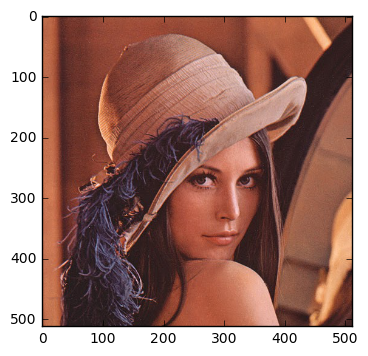

In [9]:
img = read_img('data/lena.jpg')
# 画像の表示
plt.imshow(img)

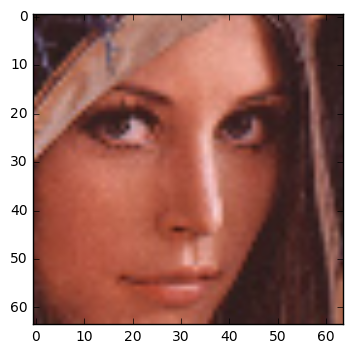

In [13]:
cascade_path = "/usr/local/opt/opencv/share/OpenCV/haarcascades/haarcascade_frontalface_alt.xml"
res_images = detect_face('data/lena.jpg' ,  cascade_path)
plt.imshow(res_images[0])

array([[[ 33,  64,  97],
        [ 32,  63,  96],
        [ 30,  61,  92],
        ..., 
        [  8,  29,  56],
        [ 14,  35,  62],
        [ 16,  37,  64]],

       [[ 36,  67, 100],
        [ 35,  66,  99],
        [ 34,  65,  98],
        ..., 
        [ 10,  31,  58],
        [ 11,  32,  59],
        [ 18,  39,  66]],

       [[ 41,  72, 105],
        [ 36,  67, 100],
        [ 31,  62,  95],
        ..., 
        [ 16,  37,  64],
        [ 21,  42,  69],
        [ 16,  37,  64]],

       ..., 
       [[ 52,  70,  87],
        [ 50,  70,  87],
        [ 49,  69,  86],
        ..., 
        [ 37,  66,  93],
        [ 31,  60,  87],
        [ 40,  69,  96]],

       [[ 54,  72,  89],
        [ 53,  71,  88],
        [ 52,  70,  87],
        ..., 
        [ 36,  65,  92],
        [ 34,  63,  90],
        [ 36,  65,  92]],

       [[ 54,  72,  89],
        [ 52,  70,  87],
        [ 55,  73,  90],
        ..., 
        [ 41,  70,  97],
        [ 32,  61,  88],
        [ 42,  71,

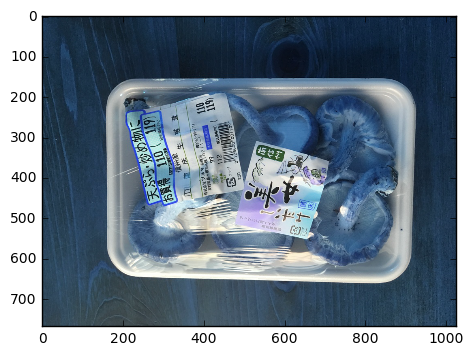

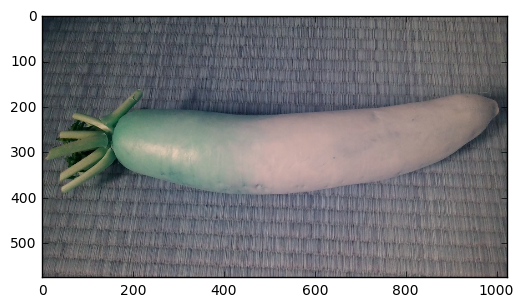

In [29]:
# データ読み込み
img0 = cv2.imread('data/train_1/train_0.jpg')
img1 = cv2.imread('data/train_1/train_1.jpg')
# データ表示 [r,g,b]を1つの成分としてもつ行列
display(img0)
# データプロット
plt.imshow(img0)
plt.show()
plt.imshow(img1)
plt.show()

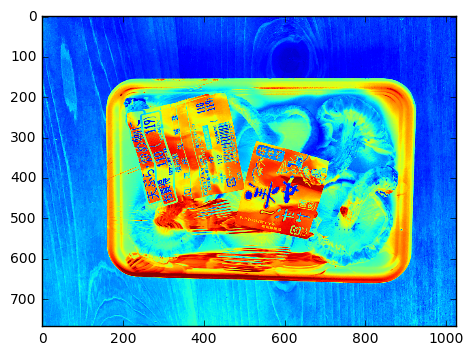

In [17]:
# グレースケール
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray1)

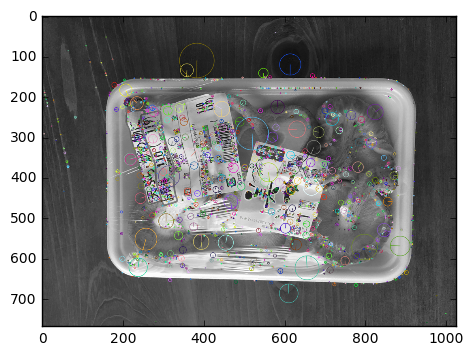

In [25]:
sift = cv2.xfeatures2d.SIFT_create()
kp1 = sift.detect(gray1) # sift特徴量
img1_sift = cv2.drawKeypoints(gray1, kp1, None, flags=4) 
plt.imshow(img1_sift)